# 1. Import libraries : 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from transformers import BertTokenizer,TFBertModel
from tensorflow.keras.layers import Input, Dense, Concatenate,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.models import Model
from imblearn.over_sampling import SMOTE

# 2.Importing data : 

In [ ]:
original_data = pd.DataFrame(pd.read_csv('original_data.csv')) # Modified to fit my own workspace -- /kaggle/input/ukraine-war/original_data.csv
original_data = original_data[['subreddit','title','selftext','upvote_ratio']]
original_data.dropna(inplace=True)
original_data.reset_index(inplace=True,drop=True)
original_data

,subreddit,title,selftext,upvote_ratio
0,europe,War in Ukraine Megathread LIII,\nThis megathread is meant for discussion of t...,0.75
1,europe,War in Ukraine Megathread L,This megathread is meant for discussion of the...,0.76
2,europe,War in Ukraine Megathread LII,"This is a special megathread. **One year ago, ...",0.77
3,Cursedgunimages,Wtf,What the hell is this russian creation !! #uk...,0.77
4,europe,War in Ukraine Megathread LV (55),\nThis megathread is meant for discussion of t...,0.74
...,...,...,...,...
4132,caps,Lucky Guess - Game 59: vs DET,This team without Ovi is *rough*. we'll see ho...,0.60
4133,caps,Lucky Guess - Game 37: vs OTT,"Shutout! you love to see it, especially in a d...",0.47
4134,caps,Lucky Guess - Game 80: vs NYI - Blunder for Be...,Keep on losing and try to move up the draft lo...,0.44
4135,u_liberty_ukraine,Liberty Ukraine in Action!,\n\nLiberty Ukraine in Action! Thank you for ...,0.90


# 3. Classify upvotes class:  

In [3]:
class Label_classification():

    def __init__(self,data):
        self.data =data

    def classify(self):
        self.data['labels'] = 'No labels'
        for index,value in self.data.iterrows():
            if value['upvote_ratio']<=0.5 :
                self.data.at[index,'labels'] = 'Less Popularity'
            elif value['upvote_ratio'] >0.5 and value['upvote_ratio'] <= 0.8 :
                self.data.at[index,'labels'] = 'Average popularity'
            elif value['upvote_ratio'] > 0.8 : 
                self.data.at[index,'labels'] = 'Most popularity'

        return self.data
            

## labeled classified data object : 

In [4]:
data = Label_classification(original_data)
data = data.classify()

# 4. Initialize BERT: 

In [5]:
bert_base_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',force_download=True)
bert_base_model = TFBertModel.from_pretrained('bert-base-uncased', output_attentions=True,force_download=True)

bert_larg_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased',force_download=True)
bert_larg_model = TFBertModel.from_pretrained('bert-large-uncased', output_attentions=True,force_download=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# 5. preprocessing class :

In [ ]:
class preprocessing():
    
    def __init__(self,max_length,tokenizer,model_encoder,data):
        self.max_length = max_length
        self.tokenizer = tokenizer
        self.model_encoder = model_encoder
        self.data = data
        
    def tokenize_and_encode(self,sentence):
        input_ids = []
        attention_masks = []
        for sent in sentence :
            encoded_dict = self.tokenizer.encode_plus ( 
            sent,
            add_special_tokens = True,
            max_length = self.max_length,
            padding = 'max_length',
            truncation = True,
            return_attention_mask = True,
            return_tensors = 'tf'
            )
            input_ids.append(encoded_dict['input_ids'])
            attention_masks.append(encoded_dict['attention_mask'])
        input_ids = tf.concat(input_ids,axis=0)
        attention_masks = tf.concat(attention_masks,axis=0)
        return input_ids,attention_masks
    
    def spilit(self):
        replace_df = {'Less Popularity':0,'Average popularity':1,'Most popularity':2}
        self.data.replace(replace_df,inplace=True)
        X = self.data['selftext']
        Y = self.data['labels']
        self.X_train,self.X_test,self.Y_train,self.Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)
        return self.X_train,self.X_test,self.Y_train,self.Y_test
    
    def convert_to_tensor(self,Y_train,Y_test):                
        Y_train = tf.convert_to_tensor(Y_train,dtype=tf.int32)
        Y_test = tf.convert_to_tensor(Y_test,dtype=tf.int32)
        return Y_train,Y_test
    
    def create_dataset(self, input_ids, attention_mask, labels, batch_size):
        dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_mask, labels))
        dataset = dataset.batch(batch_size)
        return dataset
    
    def extract_output(self,dataset):
        pooled_outputs = []
        cls_outputs = []
        for batch in dataset:
            input_ids, attention_mask, _ = batch
            outputs = self.model_encoder(input_ids=input_ids, attention_mask=attention_mask)
            pooled_output = outputs.pooler_output
            cls_output = outputs.last_hidden_state[:,0,:]
            pooled_outputs.append(pooled_output)
            cls_outputs.append(cls_output)
        return tf.concat(pooled_outputs, axis=0),tf.concat(cls_outputs, axis=0)

    def oversample_minority_classes(self):
        max_class_size = self.data['labels'].value_counts().max()
        balanced_data = pd.DataFrame()
        for label in self.data['labels'].unique():
            class_data = self.data[self.data['labels'] == label]
            if len(class_data) < max_class_size:
                class_data = class_data.sample(max_class_size, replace=True, random_state=42)
            balanced_data = pd.concat([balanced_data, class_data])
        self.data = balanced_data.sample(frac=1).reset_index(drop=True)
        return self.data

    def undersample_majority_classes(self):
        min_class_size = self.data['labels'].value_counts().min()
        balanced_data = pd.DataFrame()
        for label in self.data['labels'].unique():
            class_data = self.data[self.data['labels'] == label]
            if len(class_data) > min_class_size:
                class_data = class_data.sample(min_class_size, random_state=42)
            balanced_data = pd.concat([balanced_data, class_data])
        self.data = balanced_data.sample(frac=1).reset_index(drop=True)
        return self.data

    def smote_augmentation(self):
        # Extract features and target labels
        X = self.data['selftext']
        y = self.data['labels']

        # Tokenize and encode the text data
        input_ids, attention_masks = self.tokenize_and_encode(X)
        
        # Initialize SMOTE
        smote = SMOTE(random_state=42)
        
        # Perform SMOTE resampling on input_ids and labels
        X_resampled, y_resampled = smote.fit_resample(input_ids.numpy(), y)
        
        # Flatten tokenized sequences back to strings for DataFrame
        flattened_text = [" ".join(map(str, seq)) for seq in X_resampled]
        
        # Update self.data with SMOTE resampled data
        self.data = pd.DataFrame({'selftext': flattened_text, 'labels': y_resampled})
        
        return self.data

In [ ]:
preprocessor = preprocessing(max_length=128, tokenizer=bert_base_tokenizer, model_encoder=bert_base_model, data=data)

balanced_data_oversample = preprocessor.oversample_minority_classes()
balanced_data_undersample = preprocessor.undersample_majority_classes()
balanced_data_smote = preprocessor.smote_augmentation()


## bert base model object : 

In [7]:
# 5.1---split data :
    
original_data = preprocessing(128,bert_base_tokenizer,bert_base_model,data)
X_train,X_test,Y_train,Y_test = original_data.spilit()
    
#5.2---tokenize and encode data :

X_train_id,X_train_mask = original_data.tokenize_and_encode(X_train)
X_test_id,X_test_mask = original_data.tokenize_and_encode(X_test)

#5.3---convert label to tensor :    

Y_train,Y_test = original_data.convert_to_tensor(Y_train,Y_test)


#5.4---create train and test dataset : 

train_dataset = original_data.create_dataset(X_train_id,X_train_mask,Y_train,128)
test_dataset = original_data.create_dataset(X_test_id,X_test_mask,Y_test,128)


#5.5---extract pooler output layer and cls output layer :

pooler_output_train_base,cls_output_train_base = original_data.extract_output(train_dataset)
pooler_output_test_base,cls_output_test_base = original_data.extract_output(test_dataset)

/tmp/ipykernel_23/194608343.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data.replace(replace_df,inplace=True)


## bert larg model object :

In [8]:
# 5.1---split data :
    
original_data = preprocessing(128,bert_larg_tokenizer,bert_larg_model,data)
X_train,X_test,Y_train,Y_test = original_data.spilit()
    
#5.2---tokenize and encode data :

X_train_id,X_train_mask = original_data.tokenize_and_encode(X_train)
X_test_id,X_test_mask = original_data.tokenize_and_encode(X_test)

#5.3---convert label to tensor :    

Y_train,Y_test = original_data.convert_to_tensor(Y_train,Y_test)


#5.4---create train and test dataset : 

train_dataset = original_data.create_dataset(X_train_id,X_train_mask,Y_train,128)
test_dataset = original_data.create_dataset(X_test_id,X_test_mask,Y_test,128)


#5.5---extract pooler output layer and cls output layer :

pooler_output_train_larg,cls_output_train_larg = original_data.extract_output(train_dataset)
pooler_output_test_larg,cls_output_test_larg = original_data.extract_output(test_dataset)

# 6. model stracture class : 

In [9]:
class neural_network:
    
    def __init__(self, X_train, Y_train, X_test, Y_test,input_shape):
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
        self.input_shape = input_shape
        
        
        
    def build_model(self):
            
        input_layer = Input(shape=(self.input_shape,), dtype='float32', name='input_layer')

        hidden_layer_1 = Dense(1024, activation='relu')(input_layer)
        normalization_1 = BatchNormalization()(hidden_layer_1)
        dropout_1 = Dropout(0.5)(normalization_1)

        hidden_layer_2 = Dense(512, activation='relu')(dropout_1)
        normalization_2 = BatchNormalization()(hidden_layer_2)
        dropout_2 = Dropout(0.5)(normalization_2)

        hidden_layer_3 = Dense(256, activation='relu')(dropout_2)
        normalization_3 = BatchNormalization()(hidden_layer_3)
        dropout_2 = Dropout(0.5)(normalization_3)

        output = Dense(3, activation='softmax')(dropout_2)

        self.model = Model(inputs=input_layer, outputs=output)
        self.model.compile(
            optimizer=SGD(learning_rate=0.0001,momentum=0.8),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy']
        )
        #early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        self.model.fit(
            self.X_train, self.Y_train,
            epochs=100,
            batch_size=16,
            #callbacks=[early_stopping],
            #validation_split=0.2,
        )

        
        
    def predict(self):
        
        Y_prediction = self.model.predict(self.X_test)
        self.Y_prediction = np.argmax(Y_prediction, axis=1)
        return self.Y_prediction
        
        
    def evaluate(self):
        
        classification_reports = classification_report(self.Y_test, self.Y_prediction)
        cm_result = confusion_matrix(self.Y_test, self.Y_prediction)
        print(classification_reports)
        return cm_result

## pooled output model object(bert base) : 

In [10]:
# 6.1---create model :

pooled_layer_model = neural_network(pooler_output_train_base, Y_train, pooler_output_test_base, Y_test,768)
pooled_layer_model.build_model()

#6.2---predict : 

Y_prediction = pooled_layer_model.predict()

#6.3---evaluate model perfoemance :

confusion_matrix_result  = pooled_layer_model.evaluate()

Epoch 1/100


I0000 00:00:1729789447.460867      71 service.cc:145] XLA service 0x7d7ee8017130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729789447.460915      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729789447.460919      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 71/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3374 - loss: 1.8270

I0000 00:00:1729789452.217779      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


207/207 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.3823 - loss: 1.7192
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 1.4212
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5576 - loss: 1.1900
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5943 - loss: 1.1110
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6008 - loss: 1.0409
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.9448
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - loss: 0.9615
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - loss: 0.9323
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6617 - loss: 0.8831
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.8245
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.8602
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

## pooled output model object(bert larg) :

In [11]:
# 6.1---create model :

pooled_layer_model = neural_network(pooler_output_train_larg, Y_train, pooler_output_test_larg, Y_test,1024)
pooled_layer_model.build_model()

#6.2---predict : 

Y_prediction = pooled_layer_model.predict()

#6.3---evaluate model perfoemance :

confusion_matrix_result  = pooled_layer_model.evaluate()

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.3771 - loss: 1.7791
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4839 - loss: 1.4784
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 1.3386
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 1.2541
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 1.2064
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 1.0894
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 1.0054
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 1.0044
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 1.0179
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.8898
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6546 - loss: 0.8956
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━

## cls output model object(bert base) :

In [12]:
# 6.1---create model :

pooled_layer_model = neural_network(cls_output_train_base, Y_train, cls_output_test_base, Y_test,768)
pooled_layer_model.build_model()

#6.2---predict : 

Y_prediction = pooled_layer_model.predict()

#6.3---evaluate model perfoemance :

confusion_matrix_result  = pooled_layer_model.evaluate()

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3687 - loss: 1.7954
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 1.3267
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5708 - loss: 1.1423
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.9600
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.9511
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.8594
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 0.7982
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7121 - loss: 0.7762
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7329 - loss: 0.7117
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7423 - loss: 0.7222
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7368 - loss: 0.6754
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━

## cls output model object(bert larg) :

In [13]:
# 6.1---create model :

pooled_layer_model = neural_network(cls_output_train_larg, Y_train, cls_output_test_larg, Y_test,1024)
pooled_layer_model.build_model()

#6.2---predict : 

Y_prediction = pooled_layer_model.predict()

#6.3---evaluate model perfoemance :

confusion_matrix_result  = pooled_layer_model.evaluate()

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.4062 - loss: 1.7619
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 1.3350
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5793 - loss: 1.1501
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5980 - loss: 1.0956
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - loss: 0.9285
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - loss: 0.8988
Epoch 7/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 0.8571
Epoch 8/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: 0.7565
Epoch 9/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7358 - loss: 0.7155
Epoch 10/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7456 - loss: 0.6969
Epoch 11/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7447 - loss: 0.6906
Epoch 12/100
207/207 ━━━━━━━━━━━━━━━━━━

# 7.visualization class : 

In [14]:
class visualization():
    
    def __init__(self,confusion_matrix,model_name):
    
        self.confusion_matrix = confusion_matrix
        self.model_name = model_name
    
    
    
    def plot(self):
    
        plt.figure(figsize=(6, 4))
        plt.title(self.model_name)
        sns.heatmap(confusion_matrix_result, annot=True, cmap='Reds')
        plt.xlabel('Prediction')
        plt.ylabel('Actual')
        plt.show()

## pooled output model object(bert base) : 

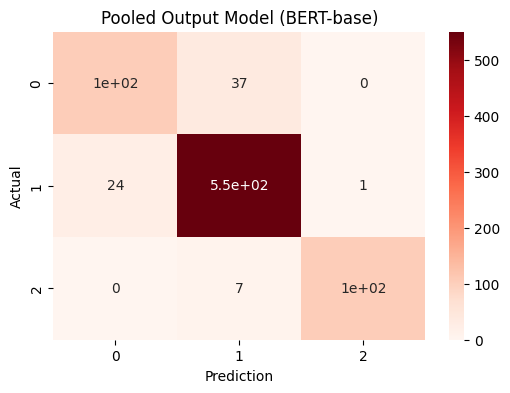

In [15]:
pooled_output = visualization(confusion_matrix_result,'Pooled Output Model (BERT-base)')
pooled_output.plot()

## pooled output model object(bert larg) :

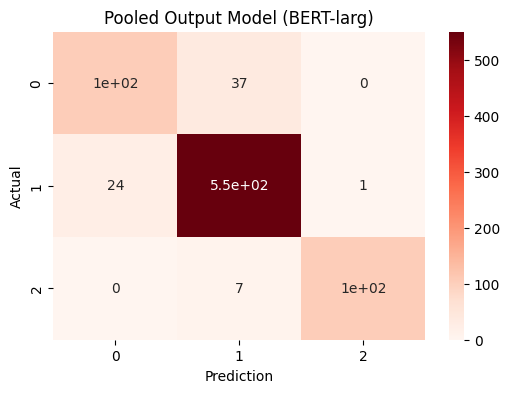

In [16]:
pooled_output = visualization(confusion_matrix_result,'Pooled Output Model (BERT-larg)')
pooled_output.plot()

## cls output model object(bert base) :

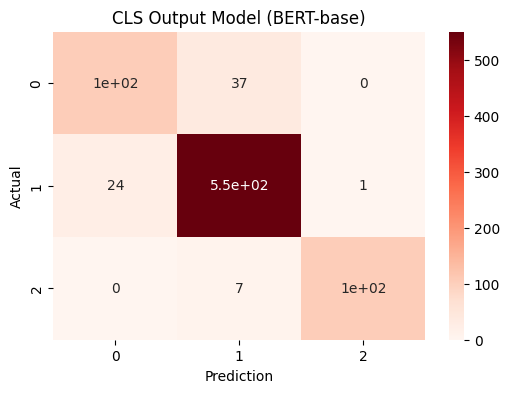

In [17]:
pooled_output = visualization(confusion_matrix_result,'CLS Output Model (BERT-base)')
pooled_output.plot()

## cls output model object(bert larg) :

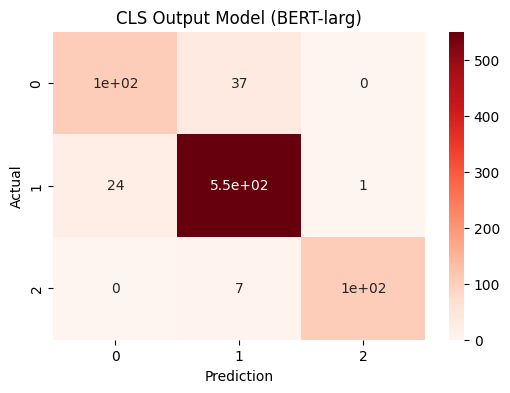

In [18]:
pooled_output = visualization(confusion_matrix_result,'CLS Output Model (BERT-larg)')
pooled_output.plot()